* Name - Vedant Kokane

* Class - BE 4

* Roll no - 41429

Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [228]:
import pandas as pd
import numpy as np

In [229]:
df = pd.read_csv('uber.csv')

In [230]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [232]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [233]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [234]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month

In [235]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8


In [236]:
df = df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [237]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8


In [238]:
df.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0
hour,0
day,0
month,0


In [239]:
df = df.dropna()

In [240]:
df.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
hour,0
day,0
month,0


In [241]:
df.shape

(199999, 9)

<Axes: xlabel='fare_amount'>

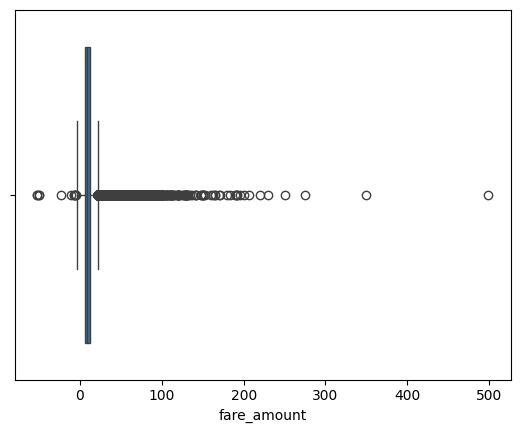

In [242]:
# treating outliers
import seaborn as sns

sns.boxplot(data=df,x=df['fare_amount'])

<Axes: xlabel='pickup_longitude'>

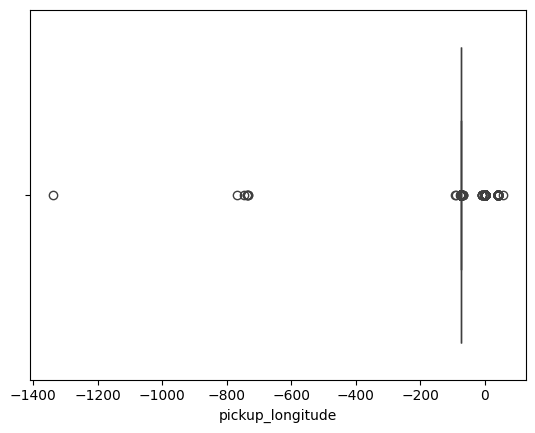

In [243]:
sns.boxplot(data=df,x=df['pickup_longitude'])

<Axes: xlabel='pickup_latitude'>

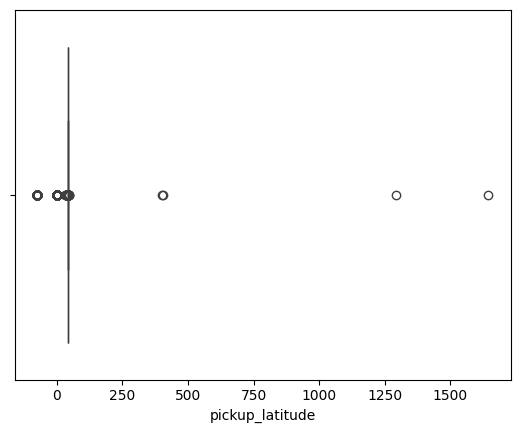

In [244]:
sns.boxplot(data=df,x=df['pickup_latitude'])

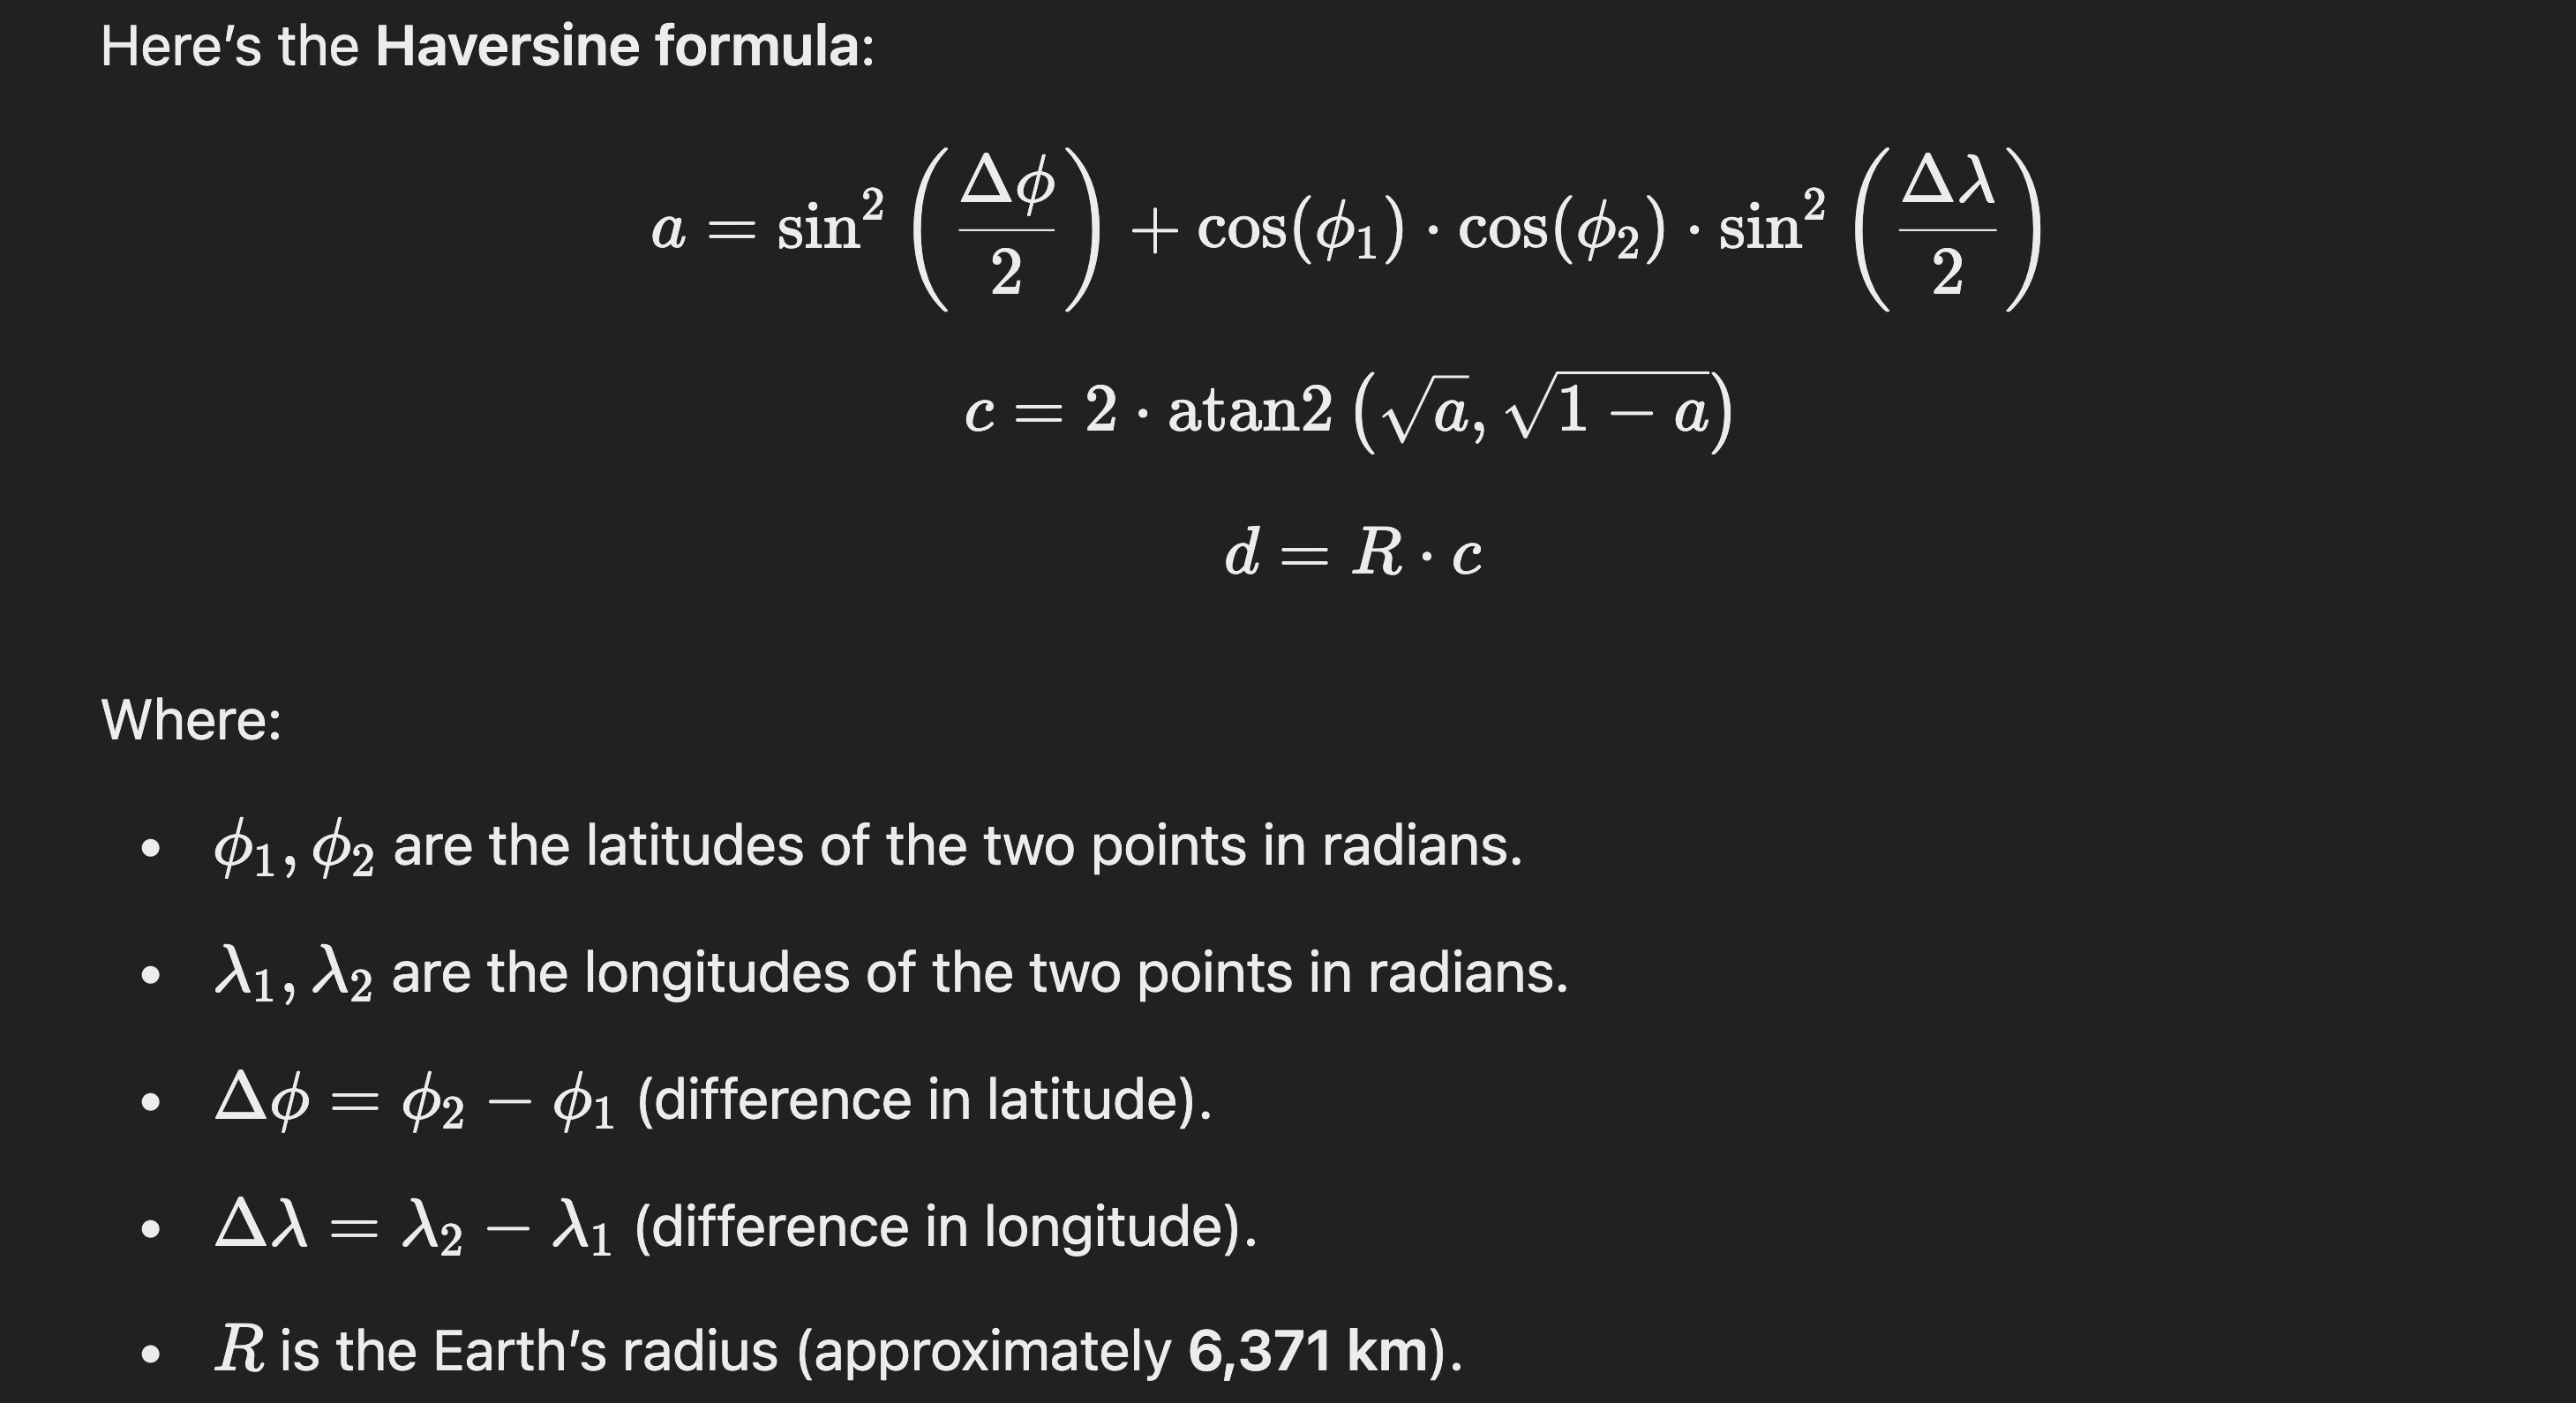

In [245]:
def haversineDistance(lon1, lat1, lon2, lat2):
   R = 6371  # Radius of the Earth in km
   # Converting degrees to radians
   lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
   dlat = lat2 - lat1
   dlon = lon2 - lon1

   a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
   c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

   distance = R * c
   return distance


df = df[(df['pickup_longitude'] >= -80) & (df['pickup_longitude'] <= -70)]
df = df[(df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 45)]
df = df[(df['dropoff_longitude'] >= -80) & (df['dropoff_longitude'] <= -70)]
df = df[(df['dropoff_latitude'] >= 40) & (df['dropoff_latitude'] <= 45)]
df['distance_in_KM'] = haversineDistance(df['pickup_longitude'], df['pickup_latitude'],
                                    df['dropoff_longitude'], df['dropoff_latitude'])


In [246]:
# using interquartile range to fill NA

def handleOutlier(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = np.clip(df[col],lower_limit,upper_limit)
  return df


df.replace(to_replace = 0, value = df['passenger_count'].mean(), inplace=True)
df[df['fare_amount'] <= 0] = df['fare_amount'].mean()

df = handleOutlier(df,'fare_amount')
df = handleOutlier(df,'pickup_longitude')
df = handleOutlier(df,'pickup_latitude')
df = handleOutlier(df,'dropoff_longitude')
df = handleOutlier(df,'dropoff_latitude')
df = handleOutlier(df,'passenger_count')
df = handleOutlier(df,'hour')
df = handleOutlier(df,'day')
df = handleOutlier(df,'month')
df = handleOutlier(df,'distance_in_KM')

<ipython-input-246-dcf31e383550>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.341838191932148' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df[df['fare_amount'] <= 0] = df['fare_amount'].mean()
<ipython-input-246-dcf31e383550>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.341838191932148' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df[df['fare_amount'] <= 0] = df['fare_amount'].mean()


<Axes: xlabel='pickup_longitude'>

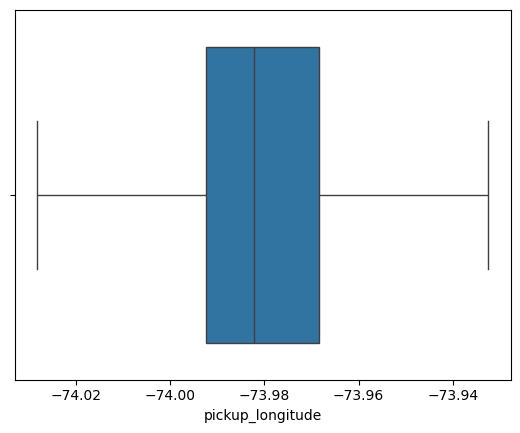

In [247]:
sns.boxplot(data=df,x=df['pickup_longitude'])

<Axes: xlabel='passenger_count'>

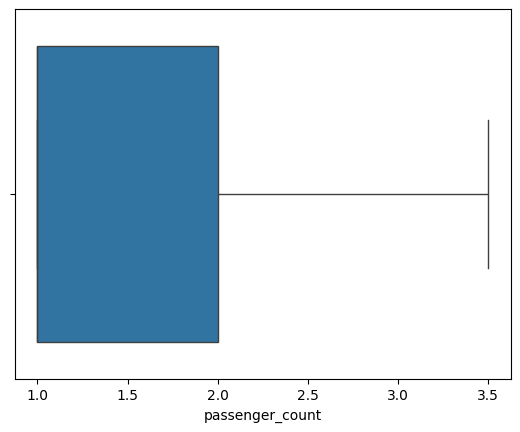

In [248]:
sns.boxplot(data=df,x=df['passenger_count'])

<Axes: xlabel='fare_amount'>

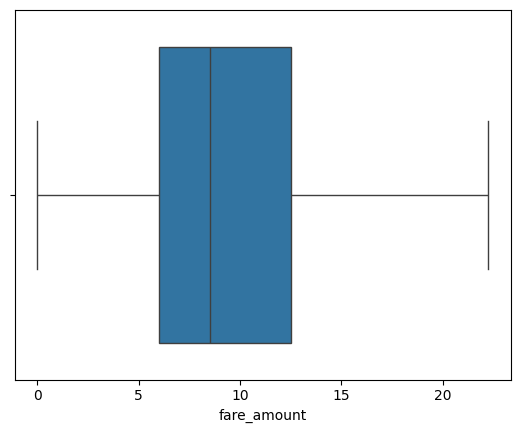

In [249]:
sns.boxplot(data=df,x=df['fare_amount'])

In [252]:
# Applying Models

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

x = df.drop(['fare_amount'],axis=1)
y = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

model1 = LinearRegression()
model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)

print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('score: ',model1.score(x_test,y_test))

R2 Score:  0.7727939287158857
MAE:  1.7620760510313016
score:  0.7727939287158857


In [255]:
# random forest
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()

model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

print('R2 Score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('score: ',model2.score(x_test,y_test))

R2 Score:  0.8110488963064679
MAE:  1.5602262289210806
score:  0.8110488963064679
